<h1 style="background-color:#ffffff;font-size:60px;font-family:Monaco;color:#045F5F;text-align:Center;border-radius: 100px 100px;">📰Fake News Recognization🔍 using NLP</h1>

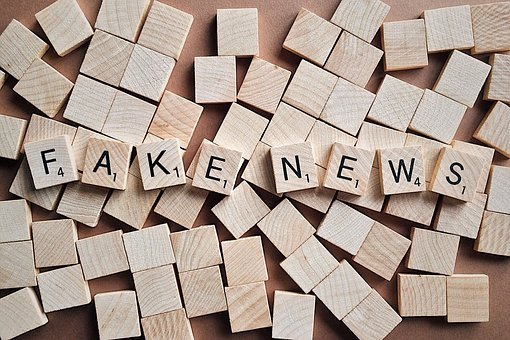

<h1 style="background-color:#ffffff;font-size:40px;font-family:Monaco;color:#045F5F;text-align:left;border-radius: 100px 100px;">Introduction 📖📖</h1>
<h1 style="background-color:#FFFFFF;font-size:20px;color:#045F5F;font-weight : bold;font-family:Papyrus">Now a day's Fake news is an increasingly common concern in our society. The term 'Fake news' is refers as disinformation/misleading information/misinformation/hoax/rumor. which are actually different varients of false information. It is spread through traditional media such as News paper or by online medium such as websites and social media. Misleading information is spread to harm the reputation of the person  or an organization.</h1>



<h1 style="background-color:#ffffff;font-size:40px;font-family:Monaco;color:#045F5F;text-align:left;border-radius: 100px 100px;">Import Libraries 📚</h1>

In [ ]:
#import libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
import plotly.express as px
from math import pi
from plotly import __version__
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

from IPython.core.display import HTML
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn import metrics

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


from pandas import DataFrame
from colorama import Fore, Back, Style
y_ = Fore.YELLOW
r_ = Fore.RED
g_ = Fore.GREEN
b_ = Fore.BLUE
m_ = Fore.MAGENTA
sr_ = Style.RESET_ALL


<h1 style="background-color:#ffffff;font-size:40px;font-family:Monaco;color:#045F5F;text-align:left;border-radius: 100px 100px;">Import Dataset 🗂️</h1>

In [ ]:
#import dataset
df=pd.read_csv("../input/source-based-news-classification/news_articles.csv")

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.shape

In [ ]:
df.columns

<h1 style="background-color:#FFFFFF;font-size:20px;color:#045F5F;font-weight : bold;font-family:Papyrus">Let's check null values</h1>

In [ ]:
df.isnull().sum()

In [ ]:
df=df.dropna()
df.head()

In [ ]:
df.groupby('label').describe()

In [ ]:
import pandas_profiling
df.profile_report()

<h1 style="background-color:#ffffff;font-size:40px;font-family:Monaco;color:#045F5F;text-align:left;border-radius: 100px 100px;">Exploratory Data Analysis 📊🎨</h1>

In [ ]:
import seaborn as sns
sns.set_style("whitegrid")
sns.countplot(df['label']);

<h1 style="background-color:#FFFFFF;font-size:20px;color:#045F5F;font-weight : bold;font-family:Papyrus">Distribution of Types of Artices</h1>

In [ ]:
df['type'].value_counts().plot.pie(figsize = (15,12), startangle = 75,autopct = "%.1f%%",shadow=True)
plt.title('Types of Articles', fontsize = 25)
plt.axis('off')
plt.legend()
plt.show()

In [ ]:
title_len=df['title'].apply(len)
text_len=df['text'].apply(len)

plt.figure(figsize = (15,10))
#sns.scatterplot(data=df, x=text_len, y=title_len,hue='label',style="label",col='label')
sns.relplot(
    data=df, x=text_len, y=title_len,
    col="label", hue="label", style="label",
    kind="scatter"
)
plt.show()

In [ ]:
sns.stripplot(x="label", y="type", data=df,size=8,palette="Set1")


In [ ]:
plt.figure(figsize = (8,10))
sns.set_style("dark")
#chart = sns.countplot(x = "label", hue = "type" , data = df , palette = 'muted')
#chart.set_xticklabels(chart.get_xticklabels(),rotation=30)

sns.catplot(x="label", hue="type", col="label",
                data=df, kind="count",
                height=4, aspect=.7);

<h1 style="background-color:#FFFFFF;font-size:20px;color:#045F5F;font-weight : bold;font-family:Papyrus">Most Frequent word</h1>

In [ ]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(df['text_without_stopwords'], 20)
common_words_df = DataFrame (common_words,columns=['word','freq'])
fig = px.bar(common_words_df, x='word', y='freq',color='freq',
             labels={'Top 20 word & their frequency'}, height=400)

fig.show()

<h1 style="background-color:#FFFFFF;font-size:20px;color:#045F5F;font-weight : bold;font-family:Papyrus">Word_cloud ☁️</h1>

In [ ]:
# Generate a word cloud image
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


stopwords = set(STOPWORDS)
mask = np.array(Image.open("../input/input-img/News_mask.PNG"))


wordcloud = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(' '.join(df['text_without_stopwords']))

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[20,20])
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("news.png", format="png")
  


In [ ]:
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(' '.join(df['text_without_stopwords']))

plt.figure(figsize=[8,10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

In [ ]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(df['text_without_stopwords']))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
text = (' '.join(df['text_without_stopwords']))
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.show()

<h1 style="background-color:#FFFFFF;font-size:20px;color:#045F5F;font-weight : bold;font-family:Papyrus">Different Languages of Articles</h1>

In [ ]:
import seaborn as sns
sns.set_style("darkgrid")
sns.countplot(df['language'])

<h1 style="background-color:#FFFFFF;font-size:20px;color:#045F5F;font-weight : bold;font-family:Papyrus">Unigram & Bigram</h1>

In [ ]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
fig = plt.subplots(figsize=(14,4))
common_words = get_top_n_words(df['text_without_stopwords'], 20)
df2 = DataFrame (common_words,columns=['word','count'])
chart = df2.groupby('word').sum()['count'].sort_values(ascending=False).plot(kind='bar')
chart.set_xticklabels(chart.get_xticklabels(),rotation=45, horizontalalignment='right')
chart.set_title("Top 20 Unigrams",size=16)

In [ ]:
fig = plt.subplots(figsize=(14,4))
common_words = get_top_n_bigram(df['text_without_stopwords'], 20)
df3 = pd.DataFrame(common_words, columns = ['word' ,'count'])
chart = df3.groupby('word').sum()['count'].sort_values(ascending=False).plot(kind='bar')
chart.set_xticklabels(chart.get_xticklabels(),rotation=45, horizontalalignment='right')
chart.set_title("Top 20 bigrams",size=16)

In [ ]:
g = plt.subplots(figsize=(14,4))
common_words = get_top_n_trigram(df['text_without_stopwords'], 10)
df4 = pd.DataFrame(common_words, columns = ['word' ,'count'])
chart = df4.groupby('word').sum()['count'].sort_values(ascending=False).plot(kind='bar')
chart.set_xticklabels(chart.get_xticklabels(),rotation=45, horizontalalignment='right')
chart.set_title("Top 10 trigrams",size=16)

<h1 style="background-color:#ffffff;font-size:40px;font-family:Monaco;color:#045F5F;text-align:left;border-radius: 100px 100px;">Data Modelling ⛏️</h1>

In [ ]:
features = df[['site_url', 'text_without_stopwords']]
features.head(5)

In [ ]:
features['url_text'] = features["site_url"].astype(str) + " " + features["text_without_stopwords"]
features.drop(['site_url', 'text_without_stopwords'], axis = 1, inplace = True)

In [ ]:
x = features
y = df['label']

In [ ]:
y = y.tolist()

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

tfidf_vect = TfidfVectorizer(stop_words = 'english')
tfidf_train = tfidf_vect.fit_transform(x_train['url_text'])
tfidf_test = tfidf_vect.transform(x_test['url_text'])
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vect.get_feature_names())

In [ ]:
Random = RandomForestClassifier(n_estimators=150,random_state=0)
Random.fit(tfidf_train,y_train)
y_pred = Random.predict(tfidf_test)
RFscore = metrics.accuracy_score(y_test,y_pred)
print("accuracy:  %0.2f" %(RFscore*100))

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix

cm=confusion_matrix(y_test, y_pred)

fig, ax = plot_confusion_matrix(conf_mat=cm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)

In [ ]:
Adab = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10),n_estimators=5,random_state=0)
Adab.fit(tfidf_train, y_train)
y_pred = Adab.predict(tfidf_test)
ABscore = metrics.accuracy_score(y_test,y_pred)
print("accuracy: %0.2f" %(ABscore*100))

In [ ]:
cm=confusion_matrix(y_test, y_pred)

fig, ax = plot_confusion_matrix(conf_mat=cm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)


<h1 style = "font-size:30px; font-family:Papyrus ; font-weight : bold; color : #045F5F; text-align: center; border-radius: 10px 15px;"> 📚Keep Coding!!👍👍</h1>
